In [1]:
import warnings
warnings.filterwarnings("ignore")
from loadMNIST import *

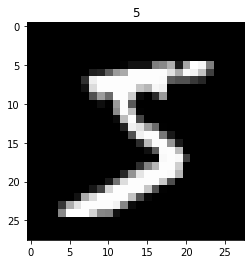

In [2]:
plot_mnist(0)

In [3]:
train_x,train_y,test_x,test_y=load_mnist()
train_x=train_x.reshape(list(train_x.shape)+[1])
test_x=test_x.reshape(list(test_x.shape)+[1])

In [4]:
from Keras_LeNet5 import LeNet

batch_size = 50
epoch = 3
model = LeNet((train_x.shape[1:]), 10)
model.summary()

W1011 00:12:59.910790 4641037632 deprecation.py:506] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "le_net"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 27, 27, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 11, 11, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 1936)              0         
_________________________________________________________________
dense (Dense)                (None, 120)               232440    
_________________________________________________________________
dense_1 (Dense)              (None, 84)                10164

Train on 48000 samples, validate on 12000 samples
Epoch 1/3
48000/48000 [==============================] - 30s 628us/sample - loss: 0.6292 - acc: 0.7998 - val_loss: 0.2391 - val_acc: 0.9280
Epoch 2/3
48000/48000 [==============================] - 40s 839us/sample - loss: 0.2219 - acc: 0.9351 - val_loss: 0.1734 - val_acc: 0.9488
Epoch 3/3
10000/10000 [==============================] - 2s 164us/sample - loss: 0.1258 - acc: 0.9619


[0.12582231865674257, 0.9619]

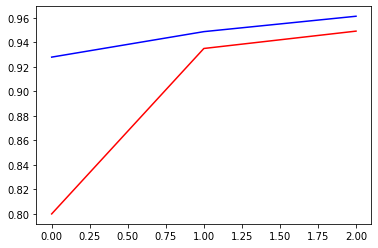

In [5]:
hist = model.fit(train_x, train_y, batch_size=batch_size, epochs=epoch, validation_split=0.2)
plt.plot(hist.history['acc'], color = 'red')
plt.plot(hist.history['val_acc'], color = 'blue')
model.evaluate(test_x, test_y)

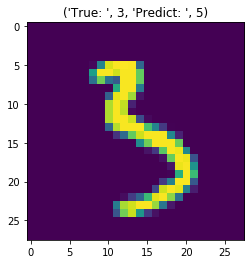

In [6]:
pred_y=np.argmax(model.predict(test_x),axis=1)
plot_miss(pred_y)